# Display Inputs and Results

In [1]:
from __future__ import print_function

In [2]:
from salib import extend, import_notebooks
from Nodes import Node
from Members import Member

In [3]:
from Frame2D_Base import Frame2D
import Frame2D_Input

In [4]:
##test:
f = Frame2D('frame-1')
f.input_all()

## Display Nodes

In [5]:
def prhead(txt,ul='='):
    """Print a heading and underline it."""
    print()
    print(txt)
    if ul:
        print(ul*(len(txt)//len(ul)))
    print()

In [6]:
@extend
class Frame2D:

    def print_nodes(self,precision=0,printdof=False):
        prhead('Nodes:')
        print('Node          X         Y  Constraints  DOF #s')
        print('----      -----     -----  -----------  ------')
        for nid,node in self.nodes.items():
            ct = ','.join(sorted(node.constraints,key=lambda t: Node.DIRECTIONS[t]))
            dt = ','.join([str(x) for x in node.dofnums])
            print('{:<5s}{:>10.{precision}f}{:>10.{precision}f}  {:<11s}  {}'\
                  .format(nid,node.x,node.y,ct,dt,precision=precision))
        if not printdof:
            return
        print()
        print('DOF#   Node  Dirn')
        print('----   ----  ----')
        for i in range(len(self.dofdesc)):
            node,dirn = self.dofdesc[i]
            print('{:>4d}   {:<4s}  {}'.format(i,node.id,dirn))


In [7]:
##test:
f.print_nodes(printdof=True)


Nodes:

Node          X         Y  Constraints  DOF #s
----      -----     -----  -----------  ------
A             0         0  FX,FY,MZ     7,8,9
B             0      4000               0,1,2
C          8000      4000               3,4,5
D          8000         0  FX,FY        10,11,6

DOF#   Node  Dirn
----   ----  ----
   0   B     FX
   1   B     FY
   2   B     MZ
   3   C     FX
   4   C     FY
   5   C     MZ
   6   D     MZ
   7   A     FX
   8   A     FY
   9   A     MZ
  10   D     FX
  11   D     FY


## Display Members

In [8]:
@extend
class Frame2D:
    
    def print_members(self,precision=1):
        prhead('Members:')
        print('Member   Node-J  Node-K    Length       dcx       dcy  Size                Ix           A  Releases')
        print('------   ------  ------    ------   -------   -------  --------      --------       -----  --------')
        for mid,memb in self.members.items():
            nj = memb.nodej
            nk = memb.nodek
            rt = ','.join(sorted(memb.releases,key=lambda t: Member.RELEASES[t]))
            print('{:<7s}  {:<6s}  {:<6s}  {:>8.{precision}f}  {:>8.5f}  {:>8.5f}  {:<10s}  {:>10g}  {:>10g}  {}'\
                  .format(memb.id,nj.id,nk.id,memb.L,memb.dcx,memb.dcy,str(memb.size),memb.Ix,memb.A,rt,precision=precision))

In [9]:
##test:
f.print_members()


Members:

Member   Node-J  Node-K    Length       dcx       dcy  Size                Ix           A  Releases
------   ------  ------    ------   -------   -------  --------      --------       -----  --------
AB       A       B         4000.0   0.00000   1.00000  W310x97       2.22e+08       12300  MZK
BC       B       C         8000.0   1.00000   0.00000  W460x106      4.88e+08       13500  
CD       C       D         4000.0   0.00000  -1.00000                2.22e+08       12300  MZJ


## Display loads

In [10]:
@extend
class Frame2D:
    
    def print_loads(self,precision=0):
        
        prhead('Node Loads:')
        if self.nodeloads:
            print('Type      Node      FX          FY          MZ')
            print('----      ----  ----------  ----------  ----------')
            for lname,node,load in self.nodeloads:
                print('{:<8s}  {:<4s}  {:>10.{precision}f}  {:>10.{precision}f}  {:>10.{precision}f}'
                      .format(lname,node.id,load.fx,load.fy,load.mz,precision=precision))
        else:
            print(" - - - none - - -")

        prhead('Member Loads:')
        if self.memberloads:
            print('Type      Member  Load')
            print('----      ------  ----------------')
            for lname,memb,load in self.memberloads:
                print("{:<8s}  {:<6s}  {}".format(lname,memb.id,load))
        else:
            print(" - - - none - - -")

        prhead('Support Displacements:')
        if self.nodedeltas:
            print('Type      Node      DX          DY          TZ')
            print('----      ----  ----------  ----------  ----------')
            for lname,node,load in self.nodedeltas:
                print('{:<8s}  {:<4s}  {:>10.{precision}f}  {:>10.{precision}f}  {:>10.{precision}f}'
                      .format(lname,node.id,load.fx,load.fy,load.mz,precision=precision))
        else:
            print(" - - - none - - -")

        prhead("Load Combinations:")
        if self.loadcombinations:
            print('Case   Type      Factor')
            print('-----  ----      ------')
            prev = None
            for cname,lname,f in self.loadcombinations:
                cn = ' '*(len(prev)//2)+'"' if cname == prev else cname
                print("{:<5s}  {:<8s}  {:>6.2f}".format(cn,lname,f))
                prev = cname
        else:
            print(" - - - none - - -")


In [11]:
##test:
f.print_loads()


Node Loads:

Type  Node      FX          FY          MZ
----  ----  ----------  ----------  ----------
wind  B        -200000           0           0

Member Loads:

Type  Member  Load
----  ------  ----------------
live  BC      UDL(L=8000.0,w=-50)
live  BC      PL(L=8000.0,P=-200000,a=5000.0)

Support Displacements:

Type  Node      DX          DY          TZ
----  ----  ----------  ----------  ----------
other  A              0         -10           0

Load Combinations:

Case   Type  Factor
-----  ----  ------
one    live    1.50
 "     wind    1.75
all    live    1.00
 "     other    1.00
 "     wind    1.00


In [12]:
@extend
class Frame2D:
    
    def print_input(self):
        
        prhead('Frame '+str(self.dsname)+':')
        print()
        print('              # of nodal degrees of freedom:',self.ndof)
        print('  # of constrained nodal degrees of freedom:',self.ncons)
        print('# of unconstrained nodal degrees of freedom:',self.nfree,' (= degree of kinematic indeterminacy)')
        m = len(self.members)
        r = self.ncons
        j = len(self.nodes)
        c = len(self.rawdata.releases)
        print()
        print('                               # of members:',m)
        print('                             # of reactions:',r)
        print('                                 # of nodes:',j)
        print('                            # of conditions:',c)
        print('           degree of statical indeterminacy:',(3*m+r)-(3*j+c))
        print('\n')

        self.print_nodes()
        print('\n')
        self.print_members()
        print('\n')
        self.print_loads()

In [13]:
##test:
f.print_input()


Frame frame-1:


              # of nodal degrees of freedom: 12
  # of constrained nodal degrees of freedom: 5
# of unconstrained nodal degrees of freedom: 7  (= degree of kinematic indeterminacy)

                               # of members: 3
                             # of reactions: 5
                                 # of nodes: 4
                            # of conditions: 2
           degree of statical indeterminacy: 0



Nodes:

Node          X         Y  Constraints  DOF #s
----      -----     -----  -----------  ------
A             0         0  FX,FY,MZ     7,8,9
B             0      4000               0,1,2
C          8000      4000               3,4,5
D          8000         0  FX,FY        10,11,6



Members:

Member   Node-J  Node-K    Length       dcx       dcy  Size                Ix           A  Releases
------   ------  ------    ------   -------   -------  --------      --------       -----  --------
AB       A       B         4000.0   0.00000   1.00000  W310x9

In [14]:
@extend
class Frame2D:
    
    def print_node_displacements(self,D=None,rs=None):
        if rs is not None and D is None:
            D = rs.node_displacements
        prhead('Node Displacements:')
        print('Node        DX         DY      Rotation')
        print('----      ------     ------   ---------')
        for node in self.nodes.values():
            d = D[node.dofnums]
            print('{:<5s} {:>10.3f} {:>10.3f} {:>11.7f}'.format(node.id,d[0,0],d[1,0],d[2,0]))    

In [15]:
##test:
import numpy as np
f.print_node_displacements(D=np.random.rand(f.ndof,1))


Node Displacements:

Node        DX         DY      Rotation
----      ------     ------   ---------
A          0.238      0.371   0.6500709
B          0.581      0.908   0.6430674
C          0.392      0.399   0.9349663
D          0.134      0.617   0.1982000


In [16]:
@extend
class Frame2D:
    
    def print_reactions(self,R=None,rs=None,mult=[1E-3,1E-3,1E-6]):
        if R is None and rs is not None:
            R = rs.reaction_forces
        prhead('Reactions:')
        print('Node        FX         FY         MZ  ')
        print('----     -------    -------    -------')
        for node in self.nodes.values():
            if node.constraints:
                efs = ['--   '] * 3
                for dirn in node.constraints:
                    i = Node.DIRECTIONS[dirn]
                    j = node.dofnums[i]
                    val = R[j-self.nfree,0]
                    efs[i] = '{:>10.3f}'.format(val*mult[i])
                print('{:<5s} {:>10s} {:>10s} {:>10s}'.format(node.id, *efs))

In [17]:
##test:
f.print_reactions(R=np.random.rand(f.ncons,1),mult=[1,1,1])


Reactions:

Node        FX         FY         MZ  
----     -------    -------    -------
A          0.941      0.850      0.122
D          0.498      0.962      --   


In [18]:
@extend
class Frame2D:
    
    def print_mefs(self,rs,mult=[1E-3,1E-3,1E-6],precision=3):
        prhead('Member End Forces:')
        print('          /----- Axial -----/   /----- Shear -----/   /----- Moment ----/')
        print('Member       FX J       FX K       FY J       FY K       MZ J       MZ K')
        print('------     -------    -------    -------    -------    -------    -------')
        for memb in self.members.values():
            mefs = rs.member_efs[memb].fefs
            fs = [mefs[i,0]*mult[i%len(mult)] for i in [0,3,1,4,2,5]]
            s = ['{:>10.{precision}f}'.format(x,precision=precision) for x in fs]
            print('{:<7s} {}'.format(memb.id,' '.join(s)))

In [19]:
@extend
class Frame2D:
    
    def print_results(self,rs):
        prhead('Results for load case: {}'.format(rs.loadcase),ul='+')
        self.print_node_displacements(rs=rs)
        self.print_reactions(rs=rs)
        self.print_mefs(rs=rs)

In [20]:
import numpy as np
import matplotlib.pyplot as plt

@extend
class Frame2D:
    
    def show(self):
        """Draw the frame geometry."""
        # reformat the coordinates to that expected by plt.plot()
        # (where each column of x is plotted against the corresponding column of y)
        # Thus each column of x contains the x-coords at either end of member; y similar
        n = len(self.members)
        x = np.zeros((2,n))
        y = np.zeros((2,n))
        for j,m in enumerate(self.members.values()):
            x[0,j] = m.nodej.x
            x[1,j] = m.nodek.x
            y[0,j] = m.nodej.y
            y[1,j] = m.nodek.y
        # size and set the drawing limits s.t. x- and y-scales are roughly the same
        xmin = np.min(x)
        xmax = np.max(x)
        ymin = np.min(y)
        ymax = np.max(y)
        size = max(xmax-xmin,ymax-ymin)*1.05
        xmid = (xmax+xmin)/2.
        ymid = (ymax+ymin)/2.
        
        plt.figure(figsize=(8.,8.))
        plt.axis([xmid-size/2.,xmid+size/2.,ymid-size/2.,ymid+size/2.])
        plt.grid(True)
        plt.plot(x,y,'b-')

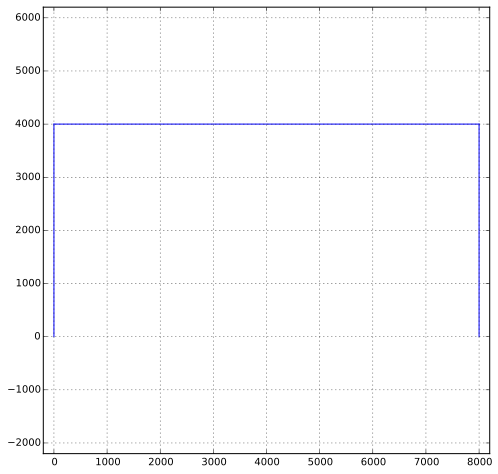

In [21]:
##test:
%matplotlib inline
f.show()